# Programming Exercise: XML, JSON, and APIs

Use the *New York Times* API to explore the frequency of a key word or concept of interest from your own field, from a time period of your choosing. You can simply present a table of article counts by year, or you may try your hand at graphing the results. Perhaps you could even compare two different concepts of interest, to see if there are different patterns over time. Get creative! But also be aware of the request limit from the API. If you make too many requests they will cut you off, and you'll start to get error messages.

In [23]:
from __future__ import division
import pandas
from matplotlib import pyplot as plt 
import seaborn as sns
import requests
import json
import math
import time
import csv
from textblob import TextBlob

%matplotlib inline

In [20]:
def grab_data(keyword):

    # set key
    key = "be8992a420bfd16cf65e8757f77a5403:8:44644296"

    # set base url
    base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

    # set search parameters
    search_params = {"q": keyword,
                     "api-key": key,
                     "begin_date": "20100101",  # date must be in YYYYMMDD format
                     "end_date": "20141231"}

    # make request
    r = requests.get(base_url, params=search_params)

    # wait 3 seconds for the GET request
    time.sleep(3)

    # convert to a dictionary
    data = json.loads(r.text)

    # get number of hits
    hits = data['response']['meta']['hits']
    print("number of hits: ", str(hits))

    # get number of pages
    pages = int(math.ceil(hits / 10))
    print("number of pages: ", str(pages))
    
    data_all = list()
    
    # now we're ready to loop through the pages
    for i in range(pages):
        print("collecting page", str(i))

        # set the page parameter
        search_params['page'] = i

        # make request
        r = requests.get(base_url, params=search_params)

        # get text and convert to a dictionary
        data = json.loads(r.text)
        
        # append dictionary to master list
        data_all.append(data)
        time.sleep(3)  # pause between calls
    filename = '../data/nyt_%s.txt' % keyword
    with open(filename, 'w') as outfile:
        json.dump(data_all, outfile)
    return data_all

In [29]:
def gen_df(data):

    # make an empty dataframe where we'll hold all of our docs for every page
    all_docs = pandas.DataFrame()
    for e in data:
        # get just the docs
        docs = e['response']['docs']
        df_temp = pandas.DataFrame(docs)

        # add those docs to the dataframe
        all_docs = pandas.concat([all_docs, df_temp], ignore_index=True)
    return(all_docs)

In [24]:
def polarity(text):
    tb = TextBlob(text)
    return(tb.sentiment.polarity)

In [25]:
def subjectivity(text):
    tb = TextBlob(text)
    return(tb.sentiment.subjectivity)

In [38]:
def clean_data(df):
    df['year'] = df['pub_date'].str[:4]
    df['polarity'] = df['snippet'].apply(polarity)
    df['subjectivity'] = df['snippet'].apply(subjectivity)
    grouped = df[['year','_id']].groupby('year').count()
    grouped_text = df[['year', 'polarity','subjectivity']].groupby('year').mean()
    grouped_all = grouped.join(grouped_text)
    grouped_all.rename(columns={'_id': 'count'}, inplace=True)
    return grouped_all

In [22]:
data_gm = grab_data("GM")

number of hits:  337
number of pages:  34
collecting page 0
collecting page 1
collecting page 2
collecting page 3
collecting page 4
collecting page 5
collecting page 6
collecting page 7
collecting page 8
collecting page 9
collecting page 10
collecting page 11
collecting page 12
collecting page 13
collecting page 14
collecting page 15
collecting page 16
collecting page 17
collecting page 18
collecting page 19
collecting page 20
collecting page 21
collecting page 22
collecting page 23
collecting page 24
collecting page 25
collecting page 26
collecting page 27
collecting page 28
collecting page 29
collecting page 30
collecting page 31
collecting page 32
collecting page 33


In [28]:
data_gm

[{'copyright': 'Copyright (c) 2018 The New York Times Company. All Rights Reserved.',
  'response': {'docs': [{'_id': '4fd399b98eb7c8105d8d5f9f',
     'abstract': 'This week, Amy Harmon, a Pulitzer Prize-winning reporter for The Times, is answering readers’ questions about her series on experimental trials for a new drug to treat melanoma. Parts 1 and 2 were published Monday and Tuesday; Part 3 will appear on Wednesday.',
     'blog': {},
     'byline': {'organization': None,
      'original': 'By AMY HARMON',
      'person': [{'firstname': 'Amy',
        'lastname': 'HARMON',
        'middlename': None,
        'organization': '',
        'qualifier': None,
        'rank': 1,
        'role': 'reported',
        'title': None}]},
     'document_type': 'blogpost',
     'headline': {'content_kicker': None,
      'kicker': 'Well',
      'main': 'Q & A: Clinical Trials for Cancer',
      'name': None,
      'print_headline': None,
      'seo': None,
      'sub': None},
     'keywords': [{'

In [30]:
df_gm = gen_df(data_gm)
df_gm

,_id,abstract,blog,byline,document_type,headline,keywords,multimedia,new_desk,print_page,pub_date,score,section_name,snippet,source,type_of_material,uri,web_url,word_count
0,4fd399b98eb7c8105d8d5f9f,"This week, Amy Harmon, a Pulitzer Prize-winnin...",{},"{'original': 'By AMY HARMON', 'person': [{'fir...",blogpost,"{'main': 'Q & A: Clinical Trials for Cancer', ...","[{'name': 'type_of_material', 'value': 'News',...",[],NaN,NaN,2010-02-23T10:38:11Z,0.0,NaN,"This week, Amy Harmon, a Pulitzer Prize-winnin...",The New York Times,Blog,NaN,https://well.blogs.nytimes.com/2010/02/23/q-a-...,4115
1,5498bec838f0d858adb4c248,NaN,{},{'original': 'By JULIA REICHERT and STEVEN BO...,article,"{'main': '‘No Guns for Christmas’', 'kicker': ...","[{'name': 'subject', 'value': 'BB and Airsoft ...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",OpEd,NaN,2014-12-23T01:00:51+0000,0.0,NaN,"Based on two police shootings in Ohio, this sh...",The New York Times,Op-Ed,nyt://article/4f56869f-2581-53e1-8682-aba4ec00...,https://www.nytimes.com/2014/12/23/opinion/no-...,369
2,54965a2338f0d814553ae317,NaN,{},"{'original': 'By THE ASSOCIATED PRESS', 'perso...",article,{'main': 'Marlins Trade Casey McGehee to the G...,"[{'name': 'subject', 'value': 'Baseball', 'ran...",[],Sports,,2014-12-22T00:00:00Z,0.0,Baseball,"Having acquired Martin Prado from the Yankees,...",The New York Times,News,NaN,https://www.nytimes.com/2014/12/22/sports/base...,308
3,547d2f1a38f0d822abda1e33,"General Motors is recalling 316,357 vehicles i...",{},"{'original': 'By THE ASSOCIATED PRESS', 'perso...",article,{'main': 'G.M. Recalls Vehicles for Headlight ...,"[{'name': 'subject', 'value': 'Recalls and Ban...",[],Business,2,2014-12-02T00:00:00Z,0.0,NaN,"General Motors is recalling 316,357 vehicles i...",The New York Times,Brief,NaN,https://www.nytimes.com/2014/12/02/business/gm...,100
4,5460e7ff38f0d873a2dbd577,NaN,{},NaN,multimedia,"{'main': 'GM ordered switches before recall', ...",[],"[{'rank': 0, 'subtype': 'wide', 'caption': Non...",Multimedia/Photos,NaN,2014-11-10T11:29:04Z,0.0,NaN,The automaker ordered replacement switches two...,Reuters,Video,NaN,https://www.nytimes.com/video/multimedia/10000...,24
5,5457a97f38f0d86ef22a1f78,The Times is beset with business challenges bu...,{},"{'original': 'By MARGARET SULLIVAN', 'person':...",blogpost,"{'main': 'Shaky Times, Strong Journalism', 'ki...",[],[],NaN,NaN,2014-11-03T11:09:41Z,0.0,The Public Editor,The Times is beset with business challenges bu...,The New York Times,Blog,NaN,https://publiceditor.blogs.nytimes.com/2014/11...,894
6,54491d6638f0d873ead244c1,NaN,{},NaN,multimedia,"{'main': 'Recalls don't slow GM sales', 'kicke...",[],"[{'rank': 0, 'subtype': 'wide', 'caption': Non...",Multimedia/Photos,NaN,2014-10-23T11:22:49Z,0.0,NaN,General Motor's strong performance in North Am...,Reuters,Video,NaN,https://www.nytimes.com/video/multimedia/10000...,19
7,54479e4238f0d850b093557e,Now that China is the world’s second-largest e...,{},"{'original': 'By BREE FENG', 'person': [{'firs...",blogpost,{'main': 'China Putting on Its Shiniest Face f...,"[{'name': 'persons', 'value': 'Xi Jinping', 'r...","[{'rank': 0, 'subtype': 'wide', 'caption': Non...",Foreign,NaN,2014-10-22T08:07:21Z,0.0,Asia Pacific,Now that China is the world’s second-largest e...,The New York Times,Blog,NaN,https://sinosphere.blogs.nytimes.com/2014/10/2...,592
8,5435bcde38f0d843550380d8,NaN,{},"{'original': 'By BENJAMIN PRESTON', 'person': ...",article,{'main': 'Wheelies: The (Possibly) Reconfigure...,"[{'name': 'subject', 'value': 'Automobiles', '...","[{'rank': 0, 'subtype': 'wide', 'caption': Non...",Business,,2014-10-09T00:00:00Z,0.0,NaN,"Sergio Marchionne, chief of Fiat Chrysler, say...",The New York Times,News,NaN,https://www.nytimes.com/2014/10/09/automobiles...,389
9,5435adeb38f0d84355038099,NaN,{},"{'original': 'By THE ASSOCIATED PRESS', 'perso...",article,{'main': 'Mazda Tops Automakers in Gas Mileage...,[],[],None,NaN,2014-10-08T17:31:02Z,0.0,NaN,Mazda led all a

In [39]:
grouped_gm = clean_data(df_gm)
grouped_gm

,count,polarity,subjectivity
year,,,
2010,88,0.065364,0.387856
2011,43,0.004315,0.256413
2012,68,0.078652,0.317951
2013,44,0.072676,0.235900
2014,94,0.076784,0.394213


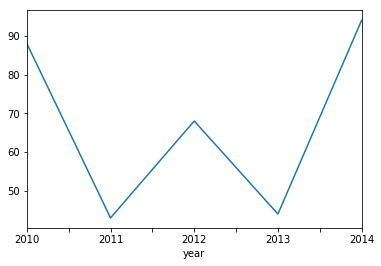

In [40]:
grouped_gm['count'].plot(kind='line')

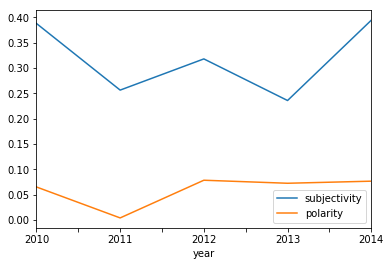

In [41]:
grouped_gm[['subjectivity', 'polarity']].plot(kind='line')

In [42]:
grouped_gm.corr()

,count,polarity,subjectivity
count,1.000000,0.545958,0.991607
polarity,0.545958,1.000000,0.443319
subjectivity,0.991607,0.443319,1.000000


In [43]:
data_tesla = grab_data("Tesla")

number of hits:  994
number of pages:  100
collecting page 0
collecting page 1
collecting page 2
collecting page 3
collecting page 4
collecting page 5
collecting page 6
collecting page 7
collecting page 8
collecting page 9
collecting page 10
collecting page 11
collecting page 12
collecting page 13
collecting page 14
collecting page 15
collecting page 16
collecting page 17
collecting page 18
collecting page 19
collecting page 20
collecting page 21
collecting page 22
collecting page 23
collecting page 24
collecting page 25
collecting page 26
collecting page 27
collecting page 28
collecting page 29
collecting page 30
collecting page 31
collecting page 32
collecting page 33
collecting page 34
collecting page 35
collecting page 36
collecting page 37
collecting page 38
collecting page 39
collecting page 40
collecting page 41
collecting page 42
collecting page 43
collecting page 44
collecting page 45
collecting page 46
collecting page 47
collecting page 48
collecting page 49
collecting page 5

In [45]:
df_tesla = gen_df(data_tesla)
df_tesla

,_id,abstract,blog,byline,document_type,headline,keywords,multimedia,new_desk,print_page,pub_date,score,section_name,slideshow_credits,snippet,source,type_of_material,uri,web_url,word_count
0,572677b638f0d81e1a72784f,NaN,{},"{'original': 'PBS Home Video', 'person': [{'fi...",multimedia,"{'main': 'Tesla: Master Of Lightning', 'kicker...",[],"[{'rank': 0, 'subtype': 'wide', 'caption': Non...",Movies,NaN,2014-12-23T18:17:30Z,0.0,NaN,NaN,"This program recounts the life of scientist, i...",Internet Video Archive,Video,NaN,https://www.nytimes.com/video/movies/100000003...,37
1,5494661338f0d87118e48ee7,Big Deal column; prices have risen 11.5 percen...,{},"{'original': 'By JULIE SATOW', 'person': [{'fi...",article,"{'main': 'New York City Prices in Miami', 'kic...","[{'name': 'subject', 'value': 'Real Estate and...","[{'rank': 0, 'subtype': 'wide', 'caption': Non...",RealEstate,1,2014-12-21T00:00:00Z,0.0,NaN,NaN,"Developers, and subsequently buyers, try to tu...",The New York Times,News,NaN,https://www.nytimes.com/2014/12/21/realestate/...,1401
2,548ce33638f0d80cddf9fd43,NaN,{},"{'original': 'By JIM MALEWITZ', 'person': [{'f...",article,{'main': 'Texas Law May Short-Circuit an Advan...,"[{'name': 'glocations', 'value': 'Texas', 'ran...",[],National,37A,2014-12-14T00:00:00Z,0.0,NaN,NaN,A Texas power line company says it has found a...,The New York Times,News,NaN,https://www.nytimes.com/2014/12/14/us/texas-la...,603
3,5488a67a38f0d82a67122f0f,NaN,{},"{'original': 'By BENJAMIN PRESTON', 'person': ...",article,{'main': 'Wheelies: The North American Finalis...,"[{'name': 'subject', 'value': 'Automobiles', '...","[{'rank': 0, 'subtype': 'wide', 'caption': Non...",Automobiles,,2014-12-11T00:00:00Z,0.0,NaN,NaN,Six finalists are chosen for the 2015 North Am...,The New York Times,News,NaN,https://www.nytimes.com/2014/12/11/automobiles...,457
4,54808ca638f0d82816289020,NaN,{},"{'original': 'By BENJAMIN PRESTON', 'person': ...",article,{'main': 'Wheelies: The James Bond’s Fiat Edit...,"[{'name': 'subject', 'value': 'Automobiles', '...","[{'rank': 0, 'subtype': 'wide', 'caption': Non...",Automobiles,,2014-12-05T00:00:00Z,0.0,NaN,NaN,The next Bond film is expected to feature 007 ...,The New York Times,News,NaN,https://www.nytimes.com/2014/12/05/automobiles...,427
5,547f27aa38f0d84a61c0fa7a,Batch of good news on economy helps push stock...,{},"{'original': 'By THE ASSOCIATED PRESS', 'perso...",article,{'main': 'Economic Data Lifts Market to New Hi...,"[{'name': 'subject', 'value': 'Stocks and Bond...",[],Business,10,2014-12-04T00:00:00Z,0.0,NaN,NaN,Strong figures on private companies’ payrolls ...,The New York Times,News,NaN,https://www.nytimes.com/2014/12/04/business/da...,598
6,547a1ec138f0d803f445b27e,Editorial welcomes move by several major autom...,{},"{'original': 'By THE EDITORIAL BOARD', 'person...",article,"{'main': 'Hydrogen Cars, Coming Down the Pike ...","[{'name': 'subject', 'value': 'Automobiles', '...",[],Editorial,8,2014-11-30T00:00:00Z,0.0,Sunday Review,NaN,They could play an important role in fighting ...,The New York Times,Editorial,NaN,https://www.nytimes.com/2014/11/30/opinion/sun...,650
7,5477e5e638f0d854b20b25b0,Tracy Gray reminds us of a revered American tr...,{},"{'original': 'By DEB AMLEN', 'person': [{'firs...",blogpost,"{'main': 'Time of Annual Madness', 'kicker': '...","[{'name': 'subject', 'value': 'Black Friday an...","[{'rank': 0, 'subtype': 'wide', 'caption': Non...",Business,NaN,2014-11-27T22:00:40Z,0.0,NaN,NaN,Tracy Gray reminds us of a revered American tr...,The New York Times,Blog,NaN,https://wordplay.blogs.nytimes.com/2014/11/27/...,431
8,54735abd38f0d85d607d5dcc,NaN,{},NaN,multimedia,"{'main': 'Tesla, BMW in talks over batteries',...",[],"[{'rank': 0, 'subtype': 'wide', 'caption': Non...",Multimedia/Photos,NaN,2014-11-24T11:19:32Z,0.0,NaN,NaN,CEO Musk tells Der Spiegel that Tesla is explo...,Reuters,Video,NaN,https://www.nytimes.com/video/multimedia/10000...,23
9,546bca0438f0d869ced9a60e,Get recommendations fro

In [46]:
grouped_tesla = clean_data(df_tesla)
grouped_tesla

,count,polarity,subjectivity
year,,,
2010,237,0.078909,0.295477
2011,132,0.083324,0.294749
2012,174,0.109621,0.325692
2013,210,0.084143,0.323414
2014,241,0.080411,0.306244


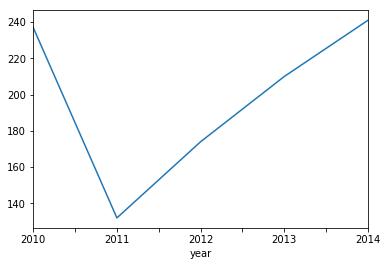

In [48]:
grouped_tesla['count'].plot(kind='line')

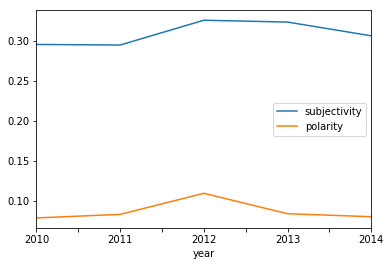

In [49]:
grouped_tesla[['subjectivity', 'polarity']].plot(kind='line')

In [50]:
grouped_tesla.corr()

,count,polarity,subjectivity
count,1.000000,-0.401469,0.024404
polarity,-0.401469,1.000000,0.686891
subjectivity,0.024404,0.686891,1.000000
